<b> STEP 1: Importing the Featured Engineered Data (ABT)<br/>
<b> STEP 2: Fitting the Models and checking their Precission (ABT)<br/>
<b> STEP 3: Predicting the results on the live Campaigns using the AdapBoosting Model<br/>  
<pre>*1.Logistic Regression*<br/>
*2.Random Forest & Random Forest Grid Search*<br/>
*3.SVM*<br/>
*4.Ensemble Model (KNN + Logistic+ Decission Trees) - Simple Averaging*<br/>
*5.AdaBoosting *<br/>
*6.XGBoosting *<br/>
*7.Ensemble Model(Logistic Regression + Random Forest Grid + AdaBoosting + XGBoosting)*<br/>
*8.Ensemble Model using Stacking function- (LGBM+Logistic Regression+XGBClassifier)*<br/>



In [1]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import os
from datetime import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
import string
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import math
import lightgbm as lgb
from sklearn import tree
from sklearn import neighbors
import math
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
from xgboost import XGBClassifier
from sklearn import model_selection
from datetime import datetime
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
kickstarter_data_v1 = pd.read_csv('C:/Sapna/Graham/Data Mining/Project/Kickstarter/Datasets/test/Processed data/Feature_engineered_data_notenc_v1.csv',engine='python')

In [3]:
kickstarter_data_v1.size
kickstarter_data_v1.shape
kickstarter_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262192 entries, 0 to 262191
Data columns (total 23 columns):
backers_count         262192 non-null int64
category_name         262192 non-null object
main_category_name    262192 non-null object
state                 262192 non-null int64
usd_goal_real         262192 non-null float64
name_len              262192 non-null float64
name_exclaim          262192 non-null int64
name_question         262192 non-null int64
name_words            262192 non-null int64
name_is_upper         262192 non-null float64
name_is_lower         262192 non-null float64
duration              262192 non-null int64
duration_st_dead      262192 non-null int64
change_flag           262192 non-null int64
launched_quarter      262192 non-null int64
launched_month        262192 non-null int64
weekday               262192 non-null int64
launched_week         262192 non-null int64
participants_qtr      262192 non-null int64
participants_mth      262192 non-null int64

In [4]:
print(list(kickstarter_data_v1))

['backers_count', 'category_name', 'main_category_name', 'state', 'usd_goal_real', 'name_len', 'name_exclaim', 'name_question', 'name_words', 'name_is_upper', 'name_is_lower', 'duration', 'duration_st_dead', 'change_flag', 'launched_quarter', 'launched_month', 'weekday', 'launched_week', 'participants_qtr', 'participants_mth', 'participants_wk', 'median_goal_year', 'mean_goal_year']


In [5]:
kickstarter_data = kickstarter_data_v1

In [6]:
#print(kickstarter_data.shape)
#print(kickstarter_data_v1.shape)
kickstarter_data.groupby(['main_category_name']).size()
kickstarter_data.groupby(['name_words']).size()

name_words
1     10553
2     22317
3     32207
4     32952
5     31142
6     29607
7     28762
8     26469
9     21717
10    14641
11     7257
12     2874
13      960
14      357
15      188
16       98
17       40
18       20
19        8
20        6
21        4
22        2
23        1
25        1
27        1
28        4
29        1
32        1
33        1
41        1
dtype: int64

In [7]:
kickstarter_data = kickstarter_data_v1[(kickstarter_data_v1['name_words']<19)]

In [8]:
kickstarter_data.shape

(262161, 23)

In [9]:
kickstarter_data.groupby(['weekday']).size()

weekday
0    44138
1    54683
2    46409
3    41486
4    40123
5    21019
6    14303
dtype: int64

In [10]:
kickstarter_data.groupby(['launched_quarter']).size()

launched_quarter
1    64961
2    69473
3    68476
4    59251
dtype: int64

In [11]:
kickstarter_data.groupby(['name_words']).size()

name_words
1     10553
2     22317
3     32207
4     32952
5     31142
6     29607
7     28762
8     26469
9     21717
10    14641
11     7257
12     2874
13      960
14      357
15      188
16       98
17       40
18       20
dtype: int64

In [12]:
drop_columns= ['category_name','duration_st_dead','change_flag','launched_month','launched_week','median_goal_year',
              'mean_goal_year','participants_mth','participants_wk']
#dropping columns above
kickstarter_data.drop(drop_columns, axis=1, inplace=True)

C:\Users\dhavy\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
print(list(kickstarter_data))

['backers_count', 'main_category_name', 'state', 'usd_goal_real', 'name_len', 'name_exclaim', 'name_question', 'name_words', 'name_is_upper', 'name_is_lower', 'duration', 'launched_quarter', 'weekday', 'participants_qtr']


In [14]:
print('Min:',kickstarter_data['usd_goal_real'].min())
print('Mean:',kickstarter_data['usd_goal_real'].mean())
print('Median:',kickstarter_data['usd_goal_real'].median())
print('Mode:',kickstarter_data['usd_goal_real'].mode())
print('Max:',kickstarter_data['usd_goal_real'].max())

Min: 602.0
Mean: 33686.09939521897
Median: 6000.0
Mode: 0    5000.0
dtype: float64
Max: 99000000.0


In [15]:
################# PERCENTILES  ##################################
goal_arr=kickstarter_data['usd_goal_real']
print('5th percentile:',np.percentile(goal_arr, 5))
print('10th percentile:',np.percentile(goal_arr, 10))
print('25th percentile:',np.percentile(goal_arr, 25))
print('50th percentile:',np.percentile(goal_arr, 50))
print('75th percentile:',np.percentile(goal_arr, 75))
print('90th percentile:',np.percentile(goal_arr, 90))
print('95th percentile:',np.percentile(goal_arr, 95))
print('99th percentile:',np.percentile(goal_arr, 99))

5th percentile: 1000.0
10th percentile: 1300.0
25th percentile: 2900.0
50th percentile: 6000.0
75th percentile: 15000.0
90th percentile: 40000.0
95th percentile: 75000.0
99th percentile: 300000.0


In [16]:
# One-Hot encoding to convert categorical columns to numeric
print('start one-hot encoding')

kickstarter_data = pd.get_dummies(kickstarter_data, prefix = ['cat','weekday','quart'],
                             columns = ['main_category_name','weekday','launched_quarter'])
    
#this will have created 1-0 flag columns (like a sparse matrix)    
print('ADS dummy columns made')

start one-hot encoding
ADS dummy columns made


In [17]:
print(list(kickstarter_data))

['backers_count', 'state', 'usd_goal_real', 'name_len', 'name_exclaim', 'name_question', 'name_words', 'name_is_upper', 'name_is_lower', 'duration', 'participants_qtr', 'cat_Art', 'cat_Comics', 'cat_Crafts', 'cat_Dance', 'cat_Design', 'cat_Fashion', 'cat_Film & Video', 'cat_Food', 'cat_Games', 'cat_Journalism', 'cat_Music', 'cat_Photography', 'cat_Publishing', 'cat_Technology', 'cat_Theater', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'quart_1', 'quart_2', 'quart_3', 'quart_4']


In [18]:
# Dropping one dummy variable for each of the variables 
drop_columns= ['cat_Film & Video','weekday_6','quart_4']
#dropping columns above
kickstarter_data.drop(drop_columns, axis=1, inplace=True)

In [19]:
#kickstarter_data.to_csv(r'C:/Sapna/Graham/Data Mining/Project/Kickstarter/Datasets/test/Processed data/Feature_engineered_data_dumenc_r.csv', index = False)

In [20]:
#creating 2 arrays: features and response
#features will have all independent variables
features=list(kickstarter_data)
features.remove('state')
#response has the target variable
response= ['state']

In [21]:
kickstarter_data[features].shape
#kickstarter_data.head()
#kick_projects_ip.info()
print(list(kickstarter_data))

['backers_count', 'state', 'usd_goal_real', 'name_len', 'name_exclaim', 'name_question', 'name_words', 'name_is_upper', 'name_is_lower', 'duration', 'participants_qtr', 'cat_Art', 'cat_Comics', 'cat_Crafts', 'cat_Dance', 'cat_Design', 'cat_Fashion', 'cat_Food', 'cat_Games', 'cat_Journalism', 'cat_Music', 'cat_Photography', 'cat_Publishing', 'cat_Technology', 'cat_Theater', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'quart_1', 'quart_2', 'quart_3']


(262161, 34)

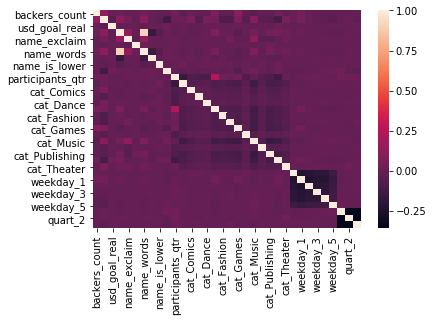

In [22]:
import seaborn as sb
sb.heatmap(kickstarter_data.corr())
kickstarter_data.shape

Split Train Test Data

In [23]:
train_ind, test_ind, train_dep, test_dep = train_test_split(kickstarter_data[features], kickstarter_data[response], test_size=0.30, random_state=2351)

In [24]:
print (train_ind.shape)
print(train_dep.shape)
print (test_ind.shape)
print(test_dep.shape)

(183512, 33)
(183512, 1)
(78649, 33)
(78649, 1)


In [25]:
features_count = [test_ind.shape[1]]
features_count

[33]

In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scale = scale.fit_transform(train_ind) 
X_test_scale = scale.transform(test_ind)


Model Building

Logistic Regression

In [27]:
mymodel= LogisticRegression()

In [28]:
mymodel.fit(train_ind[features], train_dep[response])

C:\Users\dhavy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dhavy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Train and Test Accuracy
print ("Train Accuracy :: ", (accuracy_score(train_dep[response], mymodel.predict(train_ind[features])))*100)
print ("Test Accuracy  :: ", (accuracy_score(test_dep[response], mymodel.predict(test_ind[features])))*100)
#print ("Complete Accuracy  :: ", accuracy_score(kick_projects_ip[response], trained_model_RF.predict(kick_projects_ip_scaled_ftrs)))
#print (" Confusion matrix of complete data is", confusion_matrix(kick_projects_ip[response],kick_projects_ip["Pred_state_RF"]))

Train Accuracy ::  91.73460046209512
Test Accuracy  ::  91.62481404722247


In [30]:
print(test_ind.shape)
print(train_ind.shape)

(78649, 33)
(183512, 33)


In [31]:
predict_prob_test = mymodel.predict_proba(test_ind[features])
predict_actual_test = mymodel.predict(test_ind[features])

predict_prob_train = mymodel.predict_proba(train_ind[features])
predict_actual_train = mymodel.predict(train_ind[features])

In [32]:
predict_actual_test_lr=predict_actual_test

In [33]:
print(predict_prob_test)
print(predict_prob_train)

[[6.59332944e-01 3.40667056e-01]
 [4.69819202e-01 5.30180798e-01]
 [1.79275555e-06 9.99998207e-01]
 ...
 [9.99623228e-01 3.76772387e-04]
 [4.14910918e-02 9.58508908e-01]
 [7.41334589e-01 2.58665411e-01]]
[[8.83530338e-01 1.16469662e-01]
 [1.49673284e-06 9.99998503e-01]
 [4.52351190e-01 5.47648810e-01]
 ...
 [7.76516207e-01 2.23483793e-01]
 [3.54886737e-02 9.64511326e-01]
 [9.99573324e-01 4.26676452e-04]]


Logistic Regression - Results considered for the presentation

In [34]:
conf_matrix = metrics.confusion_matrix(y_pred=predict_actual_test,y_true=test_dep) 
score = mymodel.score(test_ind[features],test_dep[response])

Text(0.5, 1, 'Accuracy Score: 0.9162481404722247')

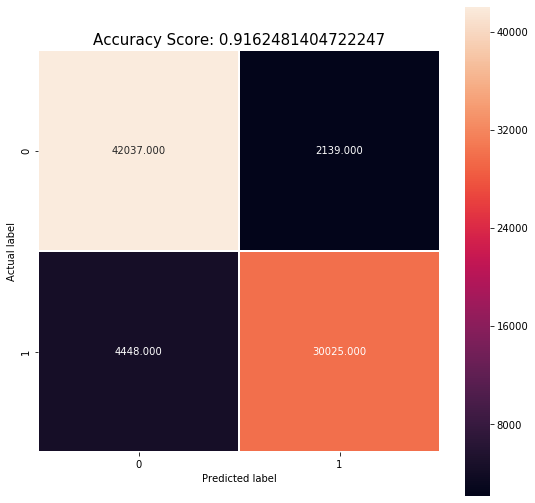

In [35]:
plt.figure(figsize=(9,9)) 
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title, size = 15)

In [36]:
from sklearn.metrics import precision_score, recall_score 
#Test on the train set
print("Train data Precision:",precision_score(train_dep,predict_actual_train)*100)
print("Train data Recall:",recall_score(train_dep,predict_actual_train)*100)

print("Test data Precision:",precision_score(test_dep,predict_actual_test_lr)*100)
print("Test data Recall:",recall_score(test_dep,predict_actual_test_lr)*100)

Train data Precision: 93.39994184970793
Train data Recall: 87.41558023897285
Test data Precision: 93.34970774779256
Test data Recall: 87.09714849302352


In [37]:
print(metrics.classification_report(y_pred=predict_actual_test_lr,y_true=test_dep))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     44176
           1       0.93      0.87      0.90     34473

    accuracy                           0.92     78649
   macro avg       0.92      0.91      0.91     78649
weighted avg       0.92      0.92      0.92     78649



In [38]:
from sklearn.metrics import f1_score
print("Train F-1 score:",f1_score(train_dep, predict_actual_train)*100)
print("Test F-1 score:",f1_score(test_dep, predict_actual_test_lr)*100)

Train F-1 score: 90.30873032099775
Test F-1 score: 90.11510122004292


In [39]:
from sklearn.metrics import roc_auc_score
#roc_auc_score_train_lr=roc_auc_score(test_dep, predict_actual_train)

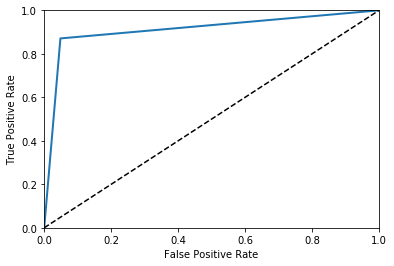

In [40]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_dep, predict_actual_test_lr) 
def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

In [41]:
y_scores_train = cross_val_predict(mymodel, train_ind, train_dep.values.ravel(), cv=5, method="predict_proba")
y_scores_test  = cross_val_predict(mymodel, test_ind, test_dep.values.ravel(), cv=5, method="predict_proba")

C:\Users\dhavy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\dhavy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [42]:
y_scores_train_v1 = y_scores_train[:, 1] 

In [43]:
y_scores_test_v1  = y_scores_test[:, 1] 

In [44]:
from sklearn.metrics import precision_recall_curve
precisions_tr, recalls_tr, thresholds_tr = precision_recall_curve(train_dep, y_scores_train_v1)

In [45]:
thresholds_tr

array([5.55230965e-29, 5.76374507e-29, 5.77088092e-29, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

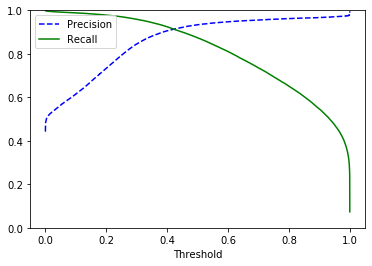

In [46]:
def plot_precision_recall_vs_threshold(precisions_tr, recalls_tr, thresholds_tr):    
    plt.plot(thresholds_tr, precisions_tr[:-1], "b--", label="Precision")    
    plt.plot(thresholds_tr, recalls_tr[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions_tr, recalls_tr, thresholds_tr) 
plt.show()

In [47]:
y_train_pred_90 = (y_scores_train_v1 > 0.6) 

In [48]:
precision_score_train_lr=precision_score(train_dep, y_train_pred_90) 

In [49]:
recall_score_train_lr=recall_score(train_dep, y_train_pred_90)

In [50]:
from sklearn.metrics import precision_recall_curve
precisions_te, recalls_te, thresholds_te = precision_recall_curve(test_dep, y_scores_test_v1)

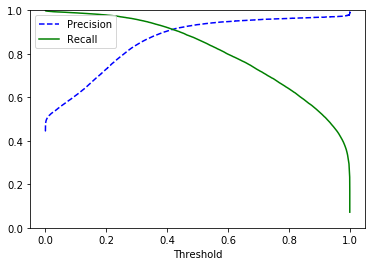

In [51]:
def plot_precision_recall_vs_threshold(precisions_te, recalls_te, thresholds_te):    
    plt.plot(thresholds_te, precisions_te[:-1], "b--", label="Precision")    
    plt.plot(thresholds_te, recalls_te[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions_te, recalls_te, thresholds_te) 
plt.show()

In [52]:
y_test_pred_90 = (y_scores_test_v1 > 0.6) 

In [53]:
precision_score_test_lr=precision_score(test_dep, y_test_pred_90) 

In [54]:
recall_score_test_lr=recall_score(test_dep, y_test_pred_90)

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_dep, y_scores_train_v1) 

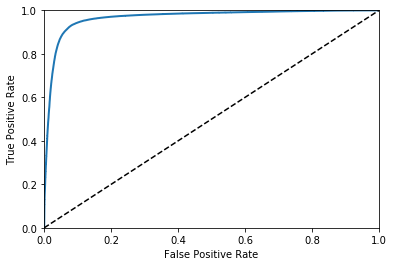

In [56]:
def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train_lr=roc_auc_score(train_dep, y_train_pred_90)
roc_auc_score_test_lr=roc_auc_score(test_dep, y_test_pred_90)

In [58]:
print("Precission Train LR:",precision_score_train_lr*100)
print("Recall Train LR:",recall_score_train_lr*100)
print("Precission Test LR:",precision_score_test_lr*100)
print("Recall Test LR:",recall_score_test_lr*100)
print("ROC AUC Train LR:",roc_auc_score_train_lr*100)
print("ROC AUC  LR:",roc_auc_score_test_lr*100)

Precission Train LR: 94.74148273419772
Recall Train LR: 81.07389357543973
Precission Test LR: 94.83257544439851
Recall Test LR: 79.85379862501088
ROC AUC Train LR: 88.7651820360007
ROC AUC  LR: 88.22914487570718


In [59]:
y_test_pred_lr =list(map(int,y_test_pred_90))

In [60]:
test_dep_v1=list(test_dep)

In [61]:
conf_matrix = metrics.confusion_matrix(y_pred=y_test_pred_lr,y_true=test_dep) 
score = mymodel.score(test_ind[features],test_dep[response])

In [62]:
print(metrics.classification_report(y_pred=y_test_pred_lr,y_true=test_dep))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     44176
           1       0.95      0.80      0.87     34473

    accuracy                           0.89     78649
   macro avg       0.90      0.88      0.89     78649
weighted avg       0.90      0.89      0.89     78649



Text(0.5, 1, 'Accuracy Score: 0.9162481404722247')

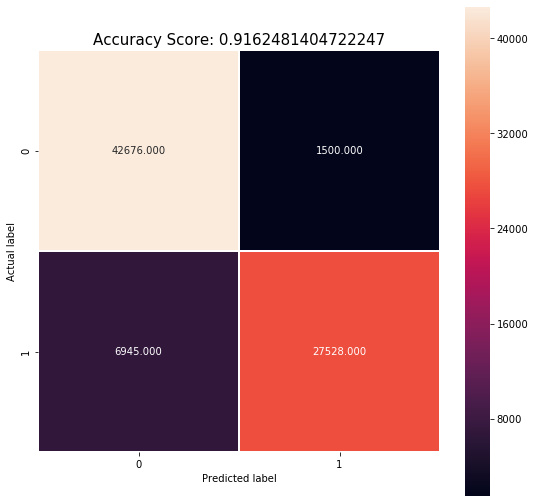

In [63]:
plt.figure(figsize=(9,9)) 
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title, size = 15)

RANDOM FOREST

Random Forest makes a good choice to compensate for this overfitting. 
Random Forest is a supervised learning algorithm that is an ensemble of Decision Trees, often trained with the “bagging” method. 
In simple words, the bagging method combines learning models to improve the overall performance. 
The Random forest algorithm builds multiple decision trees 
and merges them together to get a more accurate and stable prediction.

Random Forest gets its name from the fact that it lends an additional randomness to the model, while growing the trees.
The algorithm searches for the best feature among a random subset of features, instead of using the most important feature directly to split a node. 
This results in random splits leading to a better model and also prevents overfitting.

It is important to note that the RF algorithm uses only a random subset of the features for splitting a node. 
The randomness of the trees can be additionally increased using random thresholds for each feature instead of searching 
for the most optimal thresholds.

In [64]:
clf = RandomForestClassifier(n_estimators=500,random_state=2351)

In [65]:
clf.fit(train_ind[features], train_dep[response])

C:\Users\dhavy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=2351,
                       verbose=0, warm_start=False)

In [66]:
# Train and Test Accuracy
print ("Train Accuracy :: ", (accuracy_score(train_dep[response], clf.predict(train_ind[features])))*100)
print ("Test Accuracy  :: ", (accuracy_score(test_dep[response], clf.predict(test_ind[features])))*100)
#print ("Complete Accuracy  :: ", accuracy_score(kick_projects_ip[response], trained_model_RF.predict(kick_projects_ip_scaled_ftrs)))
#print (" Confusion matrix of complete data is", confusion_matrix(kick_projects_ip[response],kick_projects_ip["Pred_state_RF"]))

Train Accuracy ::  100.0
Test Accuracy  ::  93.39343157573524


In [67]:
print(test_ind.shape)
print(train_ind.shape)

(78649, 33)
(183512, 33)


In [68]:
predict_prob_test = clf.predict_proba(test_ind[features])
predict_actual_test = clf.predict(test_ind[features])

In [69]:
predict_actual_test_rf=predict_actual_test

In [70]:
rf_pred_train =clf.predict(train_ind[features])

In [71]:
from sklearn import metrics
print(metrics.classification_report(y_pred=rf_pred_train,y_true=train_dep[response]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102666
           1       1.00      1.00      1.00     80846

    accuracy                           1.00    183512
   macro avg       1.00      1.00      1.00    183512
weighted avg       1.00      1.00      1.00    183512



In [72]:
rf_predictions = clf.predict(test_ind[features])

In [73]:
print(metrics.classification_report(y_pred=rf_predictions,y_true=test_dep[response]))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     44176
           1       0.91      0.94      0.93     34473

    accuracy                           0.93     78649
   macro avg       0.93      0.93      0.93     78649
weighted avg       0.93      0.93      0.93     78649



In [74]:
score = clf.score(test_ind[features],test_dep[response]) 

In [75]:
print(score)

0.9339343157573523


In [76]:
conf_matrix = metrics.confusion_matrix(y_pred=predict_actual_test,y_true=test_dep) 
score = clf.score(test_ind[features],test_dep[response])

Text(0.5, 1, 'Accuracy Score: 0.9339343157573523')

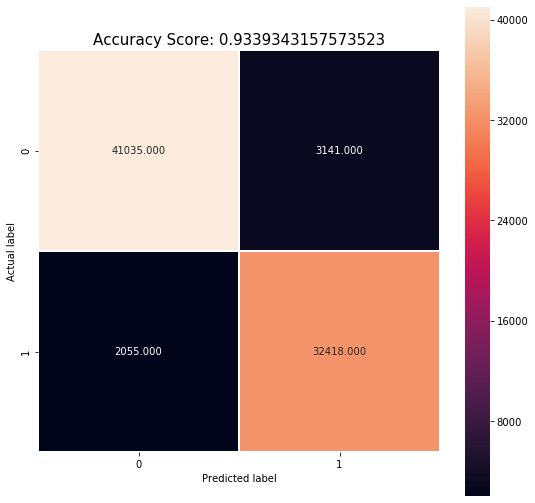

In [77]:
plt.figure(figsize=(9,9)) 
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title, size = 15)

In [78]:
## Feature importances
ftr_imp_rf=zip(features,clf.feature_importances_)
for values in ftr_imp_rf:
    print(values)

('backers_count', 0.6685193487125223)
('usd_goal_real', 0.1029689706113366)
('name_len', 0.038447956306768824)
('name_exclaim', 0.003433393361070154)
('name_question', 0.0004101396547957092)
('name_words', 0.025445730961415128)
('name_is_upper', 0.0019443640081613408)
('name_is_lower', 0.0007235745751150025)
('duration', 0.03553942900748622)
('participants_qtr', 0.045374697126848024)
('cat_Art', 0.001980396445014214)
('cat_Comics', 0.002831392348283546)
('cat_Crafts', 0.001572463637500926)
('cat_Dance', 0.0012815157454075681)
('cat_Design', 0.0030893519455177276)
('cat_Fashion', 0.0032647135532542625)
('cat_Food', 0.003152632476031038)
('cat_Games', 0.004929776599562101)
('cat_Journalism', 0.0006874158412986865)
('cat_Music', 0.004874538743696833)
('cat_Photography', 0.001254124213678858)
('cat_Publishing', 0.002747974297452029)
('cat_Technology', 0.005162671977768859)
('cat_Theater', 0.002412068433067924)
('weekday_0', 0.0040099380244916225)
('weekday_1', 0.004280794627432381)
('weekd

In [79]:
feature_imp_RF=pd.DataFrame(list(zip(features,clf.feature_importances_)))
column_names_RF= ['features','RF_imp']
feature_imp_RF.columns= column_names_RF

In [80]:
feature_imp_RF= feature_imp_RF.sort_values('RF_imp',ascending=False)
feature_imp_RF[:15]

,features,RF_imp
0,backers_count,0.668519
1,usd_goal_real,0.102969
9,participants_qtr,0.045375
2,name_len,0.038448
8,duration,0.035539
5,name_words,0.025446
31,quart_2,0.005174
22,cat_Technology,0.005163
32,quart_3,0.004983
17,cat_Games,0.004930


No handles with labels found to put in legend.


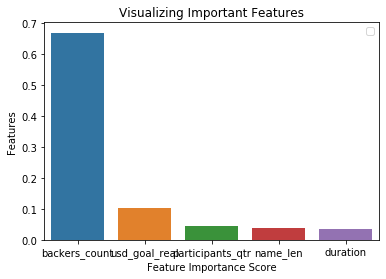

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp_RF['features'][:5], y=feature_imp_RF['RF_imp'][:5])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import precision_score, recall_score 
#Test on the train set
print("Train data Precision:",precision_score(train_dep,rf_pred_train)*100)
print("Train data Recall:",recall_score(train_dep,rf_pred_train)*100)

print("Test data Precision:",precision_score(test_dep,rf_predictions)*100)
print("Test data Recall:",recall_score(test_dep,rf_predictions)*100)

Train data Precision: 100.0
Train data Recall: 100.0
Test data Precision: 91.16679321690711
Test data Recall: 94.0388129840745


In [83]:
from sklearn.metrics import f1_score
print("Train F-1 score:",f1_score(train_dep, rf_pred_train)*100)
print("Test F-1 score:",f1_score(test_dep, rf_predictions)*100)

Train F-1 score: 100.0
Test F-1 score: 92.58053461274847


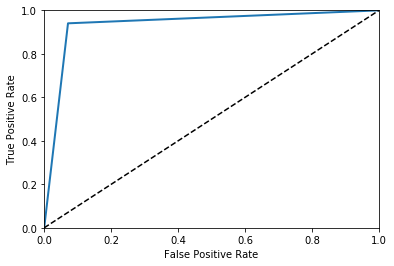

In [84]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train_lr=roc_auc_score(test_dep, rf_predictions)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_dep, rf_predictions) 
def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

In [85]:
score = clf.score(test_ind[features],test_dep[response])
print(score)

0.9339343157573523


In [86]:
y_scores_train = cross_val_predict(clf, train_ind, train_dep.values.ravel(), cv=5, method="predict_proba")
y_scores_test  = cross_val_predict(clf, test_ind, test_dep.values.ravel(), cv=5, method="predict_proba")

In [87]:
y_scores_train_v1 = y_scores_train[:, 1] 

In [88]:
y_scores_test_v1  = y_scores_test[:, 1] 

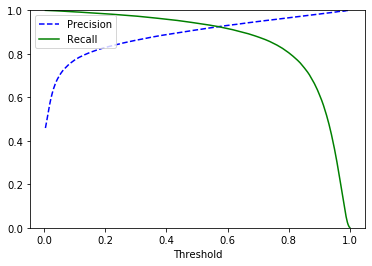

In [89]:
from sklearn.metrics import precision_recall_curve
precisions_tr, recalls_tr, thresholds_tr = precision_recall_curve(train_dep, y_scores_train_v1)

thresholds_tr

def plot_precision_recall_vs_threshold(precisions_tr, recalls_tr, thresholds_tr):    
    plt.plot(thresholds_tr, precisions_tr[:-1], "b--", label="Precision")    
    plt.plot(thresholds_tr, recalls_tr[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions_tr, recalls_tr, thresholds_tr) 
plt.show()

In [90]:
y_train_pred_90 = (y_scores_train_v1 > 0.6) 
precision_score_train_rf=precision_score(train_dep, y_train_pred_90)
recall_score_train_rf=recall_score(train_dep, y_train_pred_90)

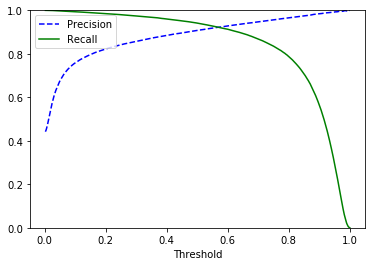

In [91]:
from sklearn.metrics import precision_recall_curve
precisions_te, recalls_te, thresholds_te = precision_recall_curve(test_dep, y_scores_test_v1)

def plot_precision_recall_vs_threshold(precisions_te, recalls_te, thresholds_te):    
    plt.plot(thresholds_te, precisions_te[:-1], "b--", label="Precision")    
    plt.plot(thresholds_te, recalls_te[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions_te, recalls_te, thresholds_te) 
plt.show()

In [92]:
y_test_pred_90 = (y_scores_test_v1 > 0.6) 
precision_score_test_rf=precision_score(test_dep, y_test_pred_90)
recall_score_test_rf=recall_score(test_dep, y_test_pred_90)

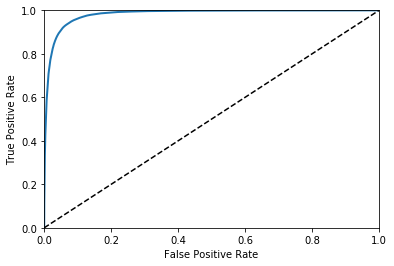

In [93]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_dep, y_scores_train_v1) 

def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

In [94]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train_rf=roc_auc_score(train_dep, y_scores_train_v1)
roc_auc_score_test_rf=roc_auc_score(test_dep, y_scores_test_v1)

In [95]:
print("Precission Train RF:",precision_score_train_rf*100)
print("Recall Train RF:",recall_score_train_rf*100)
print("Precission Test RF:",precision_score_test_rf*100)
print("Recall Test RF:",recall_score_test_rf*100)
print("ROC AUC Train RF:",roc_auc_score_train_rf*100)
print("ROC AUC RF:",roc_auc_score_test_rf*100)

Precission Train RF: 93.1083052467428
Recall Train RF: 91.57657769091854
Precission Test RF: 92.88224696535633
Recall Test RF: 91.2279175006527
ROC AUC Train RF: 98.17595734229414
ROC AUC RF: 98.08873953478418


In [96]:
y_test_pred_rf =list(map(int,y_test_pred_90))

In [97]:
conf_matrix = metrics.confusion_matrix(y_pred=y_test_pred_rf,y_true=test_dep) 
score = mymodel.score(test_ind[features],test_dep[response])

In [98]:
print(metrics.classification_report(y_pred=y_test_pred_rf,y_true=test_dep))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     44176
           1       0.93      0.91      0.92     34473

    accuracy                           0.93     78649
   macro avg       0.93      0.93      0.93     78649
weighted avg       0.93      0.93      0.93     78649



Text(0.5, 1, 'Accuracy Score: 0.9162481404722247')

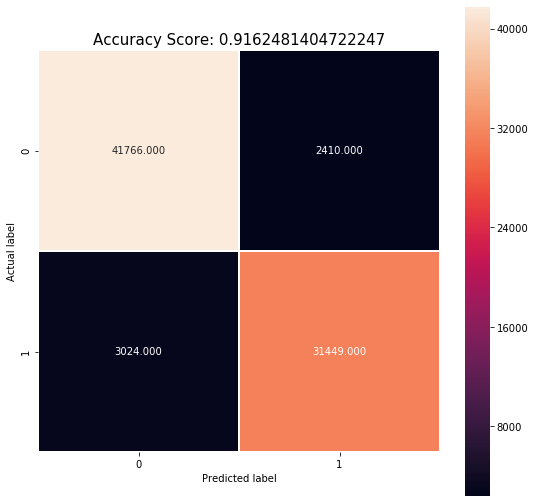

In [99]:
plt.figure(figsize=(9,9)) 
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title, size = 15)

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
rnd_frst_obj = RandomForestClassifier()

In [102]:
## Creating The Parameter List
param_grid = {'n_estimators':[50,100,150,200,250,350],
             'min_samples_split':[0.01,0.05,0.1],
             'random_state':[2351]}

In [103]:
rf_grid = GridSearchCV(rnd_frst_obj,param_grid,cv =5,scoring="roc_auc",refit=True,n_jobs=-1,verbose=5)

In [104]:
rf_grid.fit(train_ind[features],train_dep[response])

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 13.7min finished
C:\Users\dhavy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:741: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [105]:
rf_grid.best_params_

{'min_samples_split': 0.01, 'n_estimators': 350, 'random_state': 2351}

In [106]:
grid_model = rf_grid.best_estimator_

In [107]:
rf_grid.best_params_

{'min_samples_split': 0.01, 'n_estimators': 350, 'random_state': 2351}

In [108]:
grid_predict_prob = grid_model.predict_proba(test_ind[features])
grid_predict = grid_model.predict(test_ind[features])

In [109]:
conf_matrix = metrics.confusion_matrix(y_pred=grid_predict,y_true=test_dep[response])
score = grid_model.score(test_ind[features],test_dep[response])

Text(0.5, 1, 'Accuracy Score: 0.9173161769380411')

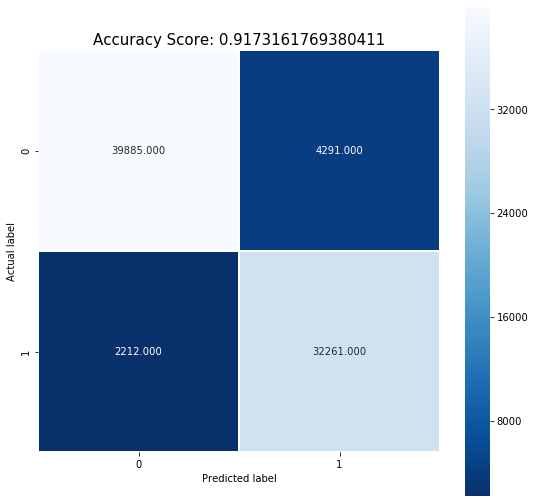

In [110]:
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [111]:
print(format(metrics.classification_report(y_pred=grid_predict,y_true=test_dep[response])))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     44176
           1       0.88      0.94      0.91     34473

    accuracy                           0.92     78649
   macro avg       0.92      0.92      0.92     78649
weighted avg       0.92      0.92      0.92     78649



In [112]:
metrics.roc_auc_score(test_dep,grid_predict_prob[:,1])

0.9724590386564911

In [113]:
rf_grid.best_params_

{'min_samples_split': 0.01, 'n_estimators': 350, 'random_state': 2351}

In [114]:
feature_importances = pd.DataFrame(grid_model.feature_importances_,
                                   index = test_ind.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [115]:
feature_importances

,importance
backers_count,0.851176
usd_goal_real,0.069128
duration,0.017992
name_words,0.008396
cat_Technology,0.007390
name_len,0.006910
cat_Music,0.006657
participants_qtr,0.005444
cat_Games,0.004017
cat_Fashion,0.003989


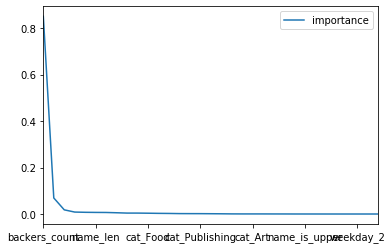

In [116]:
feature_importances.plot()

In [117]:
#{'min_samples_split': 0.01, 'n_estimators': 350, 'random_state': 2351}
clf_grid = RandomForestClassifier(min_samples_split= 0.01, n_estimators=350, random_state= 2351)

In [118]:
clf_grid.fit(train_ind[features],train_dep[response])

C:\Users\dhavy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=2351,
                       verbose=0, warm_start=False)

In [119]:
rf_pred_train=clf_grid.predict(train_ind[features])

In [120]:
rf_predictions=clf_grid.predict(test_ind[features])

In [121]:
rf_predictions_rfg=rf_predictions

Random Forest - Results considered for the presentation

In [122]:
from sklearn.metrics import precision_score, recall_score 
#Test on the train set
print("Train data Precision:",precision_score(train_dep,rf_pred_train)*100)
print("Train data Recall:",recall_score(train_dep,rf_pred_train)*100)

print("Test data Precision:",precision_score(test_dep,rf_predictions)*100)
print("Test data Recall:",recall_score(test_dep,rf_predictions)*100)

Train data Precision: 88.51976794406377
Train data Recall: 93.80055908764811
Test data Precision: 88.26056029765813
Test data Recall: 93.58338409769965


In [123]:
from sklearn.metrics import f1_score
print("Train F-1 score:",f1_score(train_dep, rf_pred_train)*100)
print("Test F-1 score:",f1_score(test_dep, rf_predictions)*100)

Train F-1 score: 91.0836861544005
Test F-1 score: 90.84406898979232


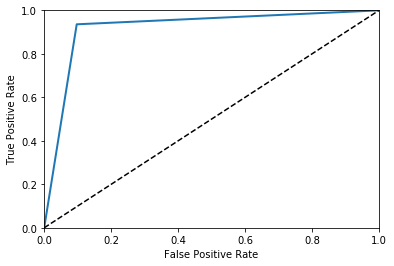

In [124]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train_lr=roc_auc_score(test_dep, rf_predictions)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_dep, rf_predictions) 
def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

In [125]:
y_scores_train = cross_val_predict(clf_grid, train_ind, train_dep.values.ravel(), cv=5, method="predict_proba")
y_scores_test  = cross_val_predict(clf_grid, test_ind, test_dep.values.ravel(), cv=5, method="predict_proba")

In [126]:
y_scores_train_v1 = y_scores_train[:, 1] 
y_scores_test_v1  = y_scores_test[:, 1] 

In [127]:
from sklearn.metrics import precision_recall_curve
precisions_tr, recalls_tr, thresholds_tr = precision_recall_curve(train_dep, y_scores_train_v1)
thresholds_tr

array([0.04390259, 0.04390309, 0.0439036 , ..., 0.94298508, 0.9441166 ,
       0.95543972])

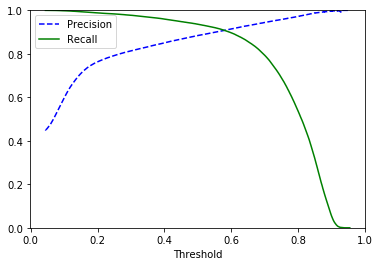

In [128]:
def plot_precision_recall_vs_threshold(precisions_tr, recalls_tr, thresholds_tr):    
    plt.plot(thresholds_tr, precisions_tr[:-1], "b--", label="Precision")    
    plt.plot(thresholds_tr, recalls_tr[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions_tr, recalls_tr, thresholds_tr) 
plt.show()

In [129]:
y_train_pred_90 = (y_scores_train_v1 > 0.6) 
precision_score_train_rfg=precision_score(train_dep, y_train_pred_90)
recall_score_train_rfg=recall_score(train_dep, y_train_pred_90)

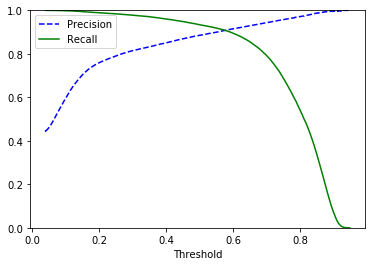

In [130]:
from sklearn.metrics import precision_recall_curve
precisions_te, recalls_te, thresholds_te = precision_recall_curve(test_dep, y_scores_test_v1)

def plot_precision_recall_vs_threshold(precisions_te, recalls_te, thresholds_te):    
    plt.plot(thresholds_te, precisions_te[:-1], "b--", label="Precision")    
    plt.plot(thresholds_te, recalls_te[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions_te, recalls_te, thresholds_te) 
plt.show()

In [131]:
y_test_pred_90 = (y_scores_test_v1 > 0.6) 
precision_score_test_rfg=precision_score(test_dep, y_test_pred_90)
recall_score_test_rfg=recall_score(test_dep, y_test_pred_90)

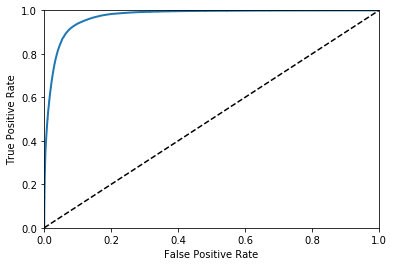

In [132]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_dep, y_scores_train_v1) 

def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

In [133]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train_rfg=roc_auc_score(train_dep, y_scores_train_v1)
roc_auc_score_test_rfg=roc_auc_score(test_dep, y_scores_test_v1)

In [134]:
print("Precission Train RFG:",precision_score_train_rfg*100)
print("Recall Train RFG:",recall_score_train_rfg*100)
print("Precission Test RFG:",precision_score_test_rfg*100)
print("Recall Test RFG:",recall_score_test_rfg*100)
print("ROC AUC Train RFG:",roc_auc_score_train_rfg*100)
print("ROC AUC RFG:",roc_auc_score_test_rfg*100)

Precission Train RFG: 91.41654165668687
Recall Train RFG: 89.69893377532593
Precission Test RFG: 91.55632088355799
Recall Test RFG: 89.45551591100282
ROC AUC Train RFG: 97.21771462910863
ROC AUC RFG: 97.23675274613764


In [135]:
y_test_pred_rfg =list(map(int,y_test_pred_90))

In [136]:
conf_matrix = metrics.confusion_matrix(y_pred=y_test_pred_rfg,y_true=test_dep) 

In [137]:
score = mymodel.score(test_ind[features],test_dep[response])

In [138]:
print(metrics.classification_report(y_pred=y_test_pred_rfg,y_true=test_dep))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     44176
           1       0.92      0.89      0.90     34473

    accuracy                           0.92     78649
   macro avg       0.92      0.92      0.92     78649
weighted avg       0.92      0.92      0.92     78649



Text(0.5, 1, 'Accuracy Score: 0.9162481404722247')

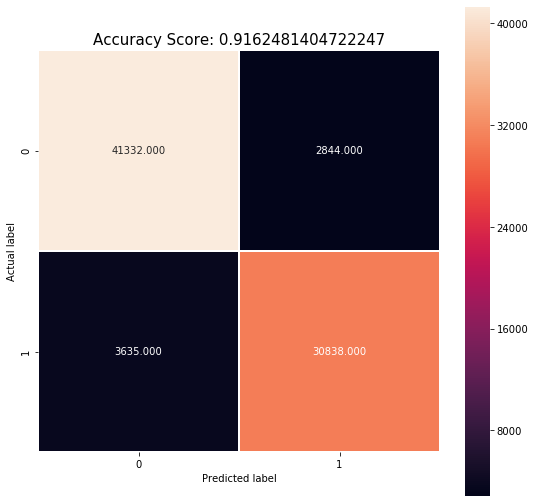

In [139]:
plt.figure(figsize=(9,9)) 
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title, size = 15)

In [140]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scale = scale.fit_transform(train_ind) 
X_test_scale = scale.transform(test_ind)

3.LinearSVM Classiﬁer - Base Model: 

In [141]:
from sklearn.svm import LinearSVC

In [142]:
linear_svc = LinearSVC(loss="hinge",random_state=2351)

In [143]:
linear_svc.fit(X_train_scale,train_dep)

C:\Users\dhavy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dhavy\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=2351, tol=0.0001, verbose=0)

In [144]:
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss='hinge', 
          max_iter=1000, multi_class='ovr', penalty='l2', random_state=2351, tol=0.0001, verbose=0)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=2351, tol=0.0001, verbose=0)

In [145]:
linearSVC_pred_train = linear_svc.predict(X_train_scale)

In [146]:
print(metrics.classification_report(y_pred=linearSVC_pred_train,y_true=train_dep))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93    102666
           1       0.93      0.88      0.90     80846

    accuracy                           0.92    183512
   macro avg       0.92      0.91      0.92    183512
weighted avg       0.92      0.92      0.92    183512



In [147]:
linearSVC_prediction = linear_svc.predict(X_test_scale)

In [148]:
score = linear_svc.score(X_test_scale,test_dep) 
print(score)

0.9161972815929001


In [149]:
conf_matrix = metrics.confusion_matrix(y_pred=linearSVC_prediction,y_true=test_dep)

Text(0.5, 1, 'Accuracy Score: 0.9161972815929001')

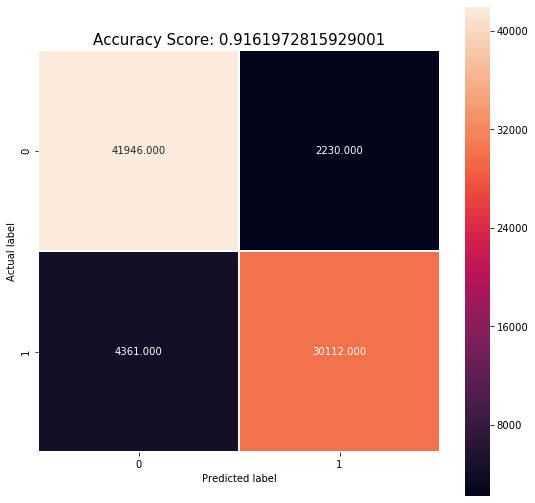

In [150]:
plt.figure(figsize=(9,9)) 
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = None)
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title, size = 15)

4. Ensemble Classifiers

Simple Ensemble: Average Probabailities

In [151]:
#creating 4 models for ensembling: Decision Tree (using gini and entropy), knn and Logistic Regression
model_dtc_g = tree.DecisionTreeClassifier()
model_dtc_e = tree.DecisionTreeClassifier(criterion="entropy")
model_knn = neighbors.KNeighborsClassifier()
model_lr= LogisticRegression(penalty='l1',solver='saga')

In [152]:
#fitting each of the model above
model_dtc_g.fit(train_ind[features], train_dep[response])
model_dtc_e.fit(train_ind[features], train_dep[response])
model_knn.fit(train_ind[features], train_dep[response])
model_lr.fit(train_ind[features], train_dep[response])

#predicting the probabilities in test
pred_dtc_g=model_dtc_g.predict_proba(test_ind[features])
pred_dtc_e=model_dtc_e.predict_proba(test_ind[features])
pred_knn=model_knn.predict_proba(test_ind[features])
pred_lr=model_lr.predict_proba(test_ind[features])

#averaging the 4 predictions above in test
finalpred=(pred_dtc_g+pred_dtc_e+pred_knn+pred_lr)/4

C:\Users\dhavy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\dhavy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dhavy\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [153]:
#creating the dataframe with predicted probabilities (for 0 and 1)
pred_proba_avg=pd.DataFrame(finalpred)
#the results have 2 probabilities: prob of the state being 0 and state being 1 in that order: hence the 2 columns
col_names=['prob_0','prob_1']
pred_proba_avg.columns=col_names

In [154]:
# if the probability of 0> probability of 1: state is 0 and vice versa
def final_state(c):
    if c['prob_0'] > c['prob_1']:
        return 0
    else:
        return 1
#creating the final predicted state column using the averaging method    
pred_proba_avg['final_state_avg'] = pred_proba_avg.apply(final_state, axis=1)

In [155]:
#appending to base dataframe
test_ind_v2=test_ind
test_ind_v2 = test_ind_v2.reset_index(drop=True)
pred_proba_avg = pred_proba_avg.reset_index(drop=True)
test_ind_v2=pd.concat([test_ind_v2,pred_proba_avg],axis=1)

Model Evaluation

In [156]:
print ("Test Accuracy  :: ", accuracy_score(test_dep[response],test_ind_v2['final_state_avg']))

Test Accuracy  ::  0.9210543045683989


              precision    recall  f1-score   support

           0       0.93      0.93      0.93     44176
           1       0.91      0.91      0.91     34473

    accuracy                           0.92     78649
   macro avg       0.92      0.92      0.92     78649
weighted avg       0.92      0.92      0.92     78649



Text(0.5, 1, 'Accuracy Score: 0.9161972815929001')

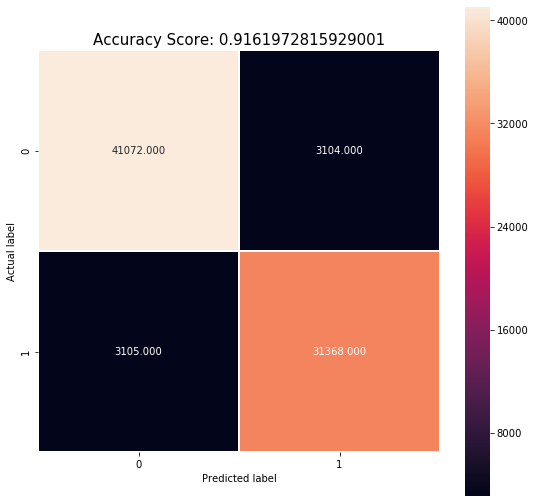

In [157]:
conf_matrix = metrics.confusion_matrix(y_pred=test_ind_v2['final_state_avg'],y_true=test_dep) 

print(metrics.classification_report(y_pred=test_ind_v2['final_state_avg'],y_true=test_dep))

plt.figure(figsize=(9,9)) 
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title, size = 15)



In [158]:
precision_score_test_en=precision_score(test_dep, test_ind_v2['final_state_avg'])
recall_score_test_en=recall_score(test_dep, test_ind_v2['final_state_avg'])

print("Precission:",precision_score_test_en*100)
print("Recall:",recall_score_test_en*100)



Precission: 90.99559062427477
Recall: 90.99295100513444


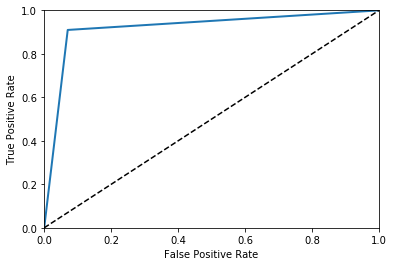

In [159]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_dep, test_ind_v2['final_state_avg']) 

def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

5.Adaptive Boosting

In [160]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [161]:
#crossvalidation=KFold(n_splits=10,shuffle=True,random_state=2351)
#for depth in range (1,20):
    #tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=2351)
    #if tree_classifier.fit(train_ind[features],train_dep[response]).tree_.max_depth<depth:
       # break
   # score=np.mean(cross_val_score(tree_classifier,train_ind[features],train_dep[response],
                                  #scoring='accuracy', cv=crossvalidation,n_jobs=1))
    #print(depth, score)
    #depth = 8 0.929925825178436

In [162]:
ada=AdaBoostClassifier()
#search_grid={'n_estimators':[100,200,300],'learning_rate':[.001,0.01,.1]}
#search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)

In [163]:
model_ada=ada.fit(train_ind[features], train_dep[response])

C:\Users\dhavy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [164]:
print(model_ada.score(train_ind[features],train_dep[response]))
print(model_ada.score(test_ind[features],test_dep[response]))

0.9306693840184838
0.9310480743556816


In [165]:
#model_ada.best_params_

In [166]:
#model_ada_v1 = AdaBoostClassifier(        
   # DecisionTreeClassifier(max_depth=9), 
   # n_estimators=100,algorithm="SAMME.R", learning_rate=0.1,random_state=2351) 

model_ada_v1 = AdaBoostClassifier(        
    DecisionTreeClassifier(max_depth=10), 
    n_estimators=300,algorithm="SAMME.R", learning_rate=0.1,random_state=2351) 

In [167]:
model_ada_v1=model_ada_v1.fit(train_ind[features],train_dep[response])

C:\Users\dhavy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
#print(model_ada_v1.score(train_ind[features],train_dep[response]))
#print(model_ada_v1.score(test_ind[features],test_dep[response]))

In [169]:
#ada_boost_prob_train = model_ada_v1.predict_proba(train_ind[features])
#ada_boost_prediction_train = model_ada_v1.predict(train_ind[features])

In [170]:
#ada_boost_prob = model_ada_v1.predict_proba(test_ind[features])

In [171]:
ada_boost_prediction = model_ada_v1.predict(test_ind[features])

In [172]:
print(classification_report(y_pred=ada_boost_prediction,y_true=test_dep[response]))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     44176
           1       0.91      0.93      0.92     34473

    accuracy                           0.93     78649
   macro avg       0.93      0.93      0.93     78649
weighted avg       0.93      0.93      0.93     78649



In [173]:
from sklearn.metrics import precision_score, recall_score 
#Test on the train set
#print("Train data Precision:",precision_score(train_dep,ada_boost_prediction_train)*100)
#print("Train data Recall:",recall_score(train_dep,ada_boost_prediction_train)*100)

print("Test data Precision:",precision_score(test_dep,ada_boost_prediction)*100)
print("Test data Recall:",recall_score(test_dep,ada_boost_prediction)*100)

Test data Precision: 91.11471953964049
Test data Recall: 92.77985669944594


In [175]:
#ada_boost_prediction_train.shape
#ada_boost_prediction.shape

In [176]:
score = model_ada_v1.score(test_ind[features],test_dep[response])
print(score)

0.9286958511869191


In [177]:
#print(model_ada.score(test_ind[features],test_dep[response]))

In [178]:
print(model_ada_v1.score(test_ind[features],test_dep[response]))

0.9286958511869191


In [179]:
conf_matrix = confusion_matrix(y_pred=ada_boost_prediction,y_true=test_dep[response])

Text(0.5, 1, 'Accuracy Score: 0.9286958511869191')

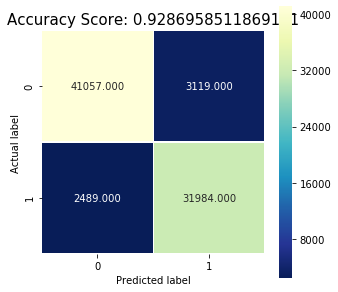

In [180]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='0.3f',linewidths='0.5',square=True,cmap='YlGnBu_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [181]:
print(classification_report(y_pred=ada_boost_prediction,y_true=test_dep[response]))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     44176
           1       0.91      0.93      0.92     34473

    accuracy                           0.93     78649
   macro avg       0.93      0.93      0.93     78649
weighted avg       0.93      0.93      0.93     78649



In [182]:
from sklearn.metrics import precision_score, recall_score 
#Test on the train set
#print("Train data Precision:",precision_score(train_dep,ada_boost_prediction_train)*100)
#print("Train data Recall:",recall_score(train_dep,ada_boost_prediction_train)*100)

print("Test data Precision:",precision_score(test_dep,ada_boost_prediction)*100)
print("Test data Recall:",recall_score(test_dep,ada_boost_prediction)*100)

Test data Precision: 91.11471953964049
Test data Recall: 92.77985669944594


In [183]:
roc_auc_score(test_dep,ada_boost_prob[:,1])

NameError: name 'ada_boost_prob' is not defined

In [ ]:
#Check for over-fitting
print(pd.DataFrame(model_ada.feature_importances_,
                                   index = test_ind.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False).head())

In [ ]:
rf_pred_train=model_ada_v1.predict(train_ind[features])
rf_predictions=model_ada_v1.predict(test_ind[features])

In [ ]:
rf_predictions_ada=rf_predictions

In [ ]:
from sklearn.metrics import precision_score, recall_score 
#Test on the train set
print("Train data Precision:",precision_score(train_dep,rf_pred_train)*100)
print("Train data Recall:",recall_score(train_dep,rf_pred_train)*100)

print("Test data Precision:",precision_score(test_dep,rf_predictions)*100)
print("Test data Recall:",recall_score(test_dep,rf_predictions)*100)

In [ ]:
from sklearn.metrics import f1_score
print("Train F-1 score:",f1_score(train_dep, rf_pred_train)*100)
print("Test F-1 score:",f1_score(test_dep, rf_predictions)*100)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_dep, rf_predictions_ada) 

def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
#y_scores_train = cross_val_predict(model_ada_v1, train_ind, train_dep.values.ravel(), cv=5,method="predict_proba")
#y_scores_test  = cross_val_predict(model_ada_v1, test_ind, test_dep.values.ravel(), cv=5,method="predict_proba")
ada_boost_prediction.shape

In [ ]:
y_scores_train_v1 = ada_boost_prediction_train 
y_scores_test_v1  =  ada_boost_prediction

In [ ]:
print(y_scores_train_v1.shape)
print(y_scores_test_v1.shape)

In [ ]:
from sklearn.metrics import precision_score, recall_score 
y_train_pred_90 = (y_scores_train_v1 > 0.6) 
precision_score_train_ada=precision_score(train_dep, y_train_pred_90)
recall_score_train_ada=recall_score(train_dep, y_train_pred_90)

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions_te, recalls_te, thresholds_te = precision_recall_curve(test_dep, y_scores_test_v1)

def plot_precision_recall_vs_threshold(precisions_te, recalls_te, thresholds_te):    
    plt.plot(thresholds_te, precisions_te[:-1], "b--", label="Precision")    
    plt.plot(thresholds_te, recalls_te[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions_te, recalls_te, thresholds_te) 
plt.show()

In [ ]:
y_test_pred_90 = (y_scores_test_v1 > 0.8) 
precision_score_test_ada=precision_score(test_dep, y_test_pred_90)
recall_score_test_ada=recall_score(test_dep, y_test_pred_90)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_dep, y_scores_train_v1) 
def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train_ada=roc_auc_score(train_dep, y_scores_train_v1)
roc_auc_score_test_ada=roc_auc_score(test_dep, y_scores_test_v1)

In [ ]:
#print("Precission Train Ada:",precision_score_train_ada*100)
#print("Recall Train Ada:",recall_score_train_ada*100)
print("Precission Test Ada:",precision_score_test_ada*100)
print("Recall Test Ada:",recall_score_test_ada*100)
#print("ROC AUC Train Ada:",roc_auc_score_train_ada*100)
#print("ROC AUC Ada:",roc_auc_score_test_ada*100)

In [ ]:
#Spliting the data in 80:20 ratio and then re-fitting the model
x_train, x_test, y_train, y_test = train_test_split(kickstarter_data[features], kickstarter_data[response], test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0,learning_rate=0.4)
clf.fit(x_train, y_train)
clf.feature_importances_
model_data.columns.values
yhat_train = clf.predict(x_train)

In [ ]:
clf.feature_importances_

In [ ]:
yhat_train = clf.predict(train_ind)
accuracy_score(train_resp,yhat_train)
#train performance
print(classification_report(yhat_train, y_train))
#test performance
yhat_test = clf.predict(x_test)
print(classification_report(yhat_test, y_test))
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_test.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

Adaptive Boosting - Results considered for the presentation

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,yhat_test)
conf_matrix

from sklearn.metrics import plot_roc_curve

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

from sklearn.metrics import roc_curve
from sklearn.metrics import au

In [ ]:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, yhat_test) 

def plot_roc_curve(fpr_xg, tpr_xg, label=None):    
    plt.plot(fpr_xg, tpr_xg, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

clf.score(x, y)

roc_auc_score(y_test, yhat_test)

In [ ]:
#plot confusion matrix
plt.figure(figsize=(15,4))
sns.heatmap(conf_matrix,annot=True,fmt='0.3f',linewidths='0.5',square=True,cmap='YlGnBu_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

6.XGBoost model

XGBoost is an implementation of gradient boosted decision trees designed which promises speed and performance. 
The two reasons XGBoost is a good choice of model are: 1.Execution Speed (as compared to decision trees) 
2.Model Performance. 
This algorithm is also known as gradient boosting, multiple additive regression trees, stochastic gradient boosting or gradient boosting machines.

The basic concept of Boosting is that it is an ensemble technique where new models are added to correct the errors made by existing models. 
Models are added sequentially until no further improvements can be made. In Gradient boosting, new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called so as it uses a gradient descent algorithm to minimize the loss when adding new models. The parameters used to optimize the XGBoost model at every tree is: Logarithmic Loss, or simply Log Loss. It is a classification loss function.

Log Loss quantifies the accuracy of a classifier by penalising false classifications based on the probability of assigning that class. 
Minimising the Log Loss is basically equivalent to maximising the accuracy of the classifier.

In [ ]:
# defining the XGBoost model
xgb_model = XGBClassifier(
 n_estimators= 300,
 learning_rate= 0.08,
 max_depth= 5,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic'
 )

In [ ]:
# model fitting
xgb_model=xgb_model.fit(train_ind[features], train_dep[response])

Prediction XGB

Evaluating XGB classifier

In [ ]:
print ("Test Accuracy :: ",(accuracy_score(test_dep[response], xgb_model.predict(test_ind[features])))*100)
print ("Train Accuracy :: ",(accuracy_score(train_dep[response], xgb_model.predict(train_ind[features])))*100)

In [ ]:
xg_boost_prob = xgb_model.predict_proba(test_ind[features])
xg_boost_prediction = xgb_model.predict(test_ind[features])

In [ ]:
score = xgb_model.score(test_ind[features],test_dep[response])
print(score)

In [ ]:
conf_matrix = confusion_matrix(y_pred=xg_boost_prediction,y_true=test_dep)

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix,annot=True,fmt='0.3f',linewidths='0.5',square=True,cmap='YlGnBu_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [ ]:
print(classification_report(y_pred=xg_boost_prediction,y_true=test_dep))

In [ ]:
roc_auc_score(test_dep,xg_boost_prob[:,1])

In [ ]:
# Classification Report from Train Data
print(classification_report(y_pred=xgb_model.predict(train_ind),y_true=train_dep))

In [ ]:
## Feature importances
ftr_imp=zip(features,xgb_model.feature_importances_)

In [ ]:
for values in ftr_imp:
    print(values)

In [ ]:
# creating a dataframe
feature_imp=pd.DataFrame(list(zip(features,xgb_model.feature_importances_)))
column_names= ['features','XGB_imp']
feature_imp.columns= column_names

In [ ]:
# sort in descending order of importances
feature_imp= feature_imp.sort_values('XGB_imp',ascending=False)
feature_imp[:15]

In [ ]:
rf_pred_train=xgb_model.predict(train_ind[features])
rf_predictions=xgb_model.predict(test_ind[features])

XG Boosting - Results considered for the presentation

In [ ]:
from sklearn.metrics import precision_score, recall_score 
#Test on the train set
print("Train data Precision:",precision_score(train_dep,rf_pred_train)*100)
print("Train data Recall:",recall_score(train_dep,rf_pred_train)*100)

print("Test data Precision:",precision_score(test_dep,rf_predictions)*100)
print("Test data Recall:",recall_score(test_dep,rf_predictions)*100)

In [ ]:
from sklearn.metrics import f1_score
print("Train F-1 score:",f1_score(train_dep, rf_pred_train)*100)
print("Test F-1 score:",f1_score(test_dep, rf_predictions)*100)

In [ ]:
y_scores_train = cross_val_predict(xgb_model, train_ind, train_dep.values.ravel(), cv=5, method="predict_proba")
y_scores_test  = cross_val_predict(xgb_model, test_ind, test_dep.values.ravel(), cv=5, method="predict_proba")

In [ ]:
y_scores_train_v1 = y_scores_train[:, 1] 
y_scores_test_v1  = y_scores_test[:, 1] 

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions_tr, recalls_tr, thresholds_tr = precision_recall_curve(train_dep, y_scores_train_v1)

thresholds_tr

def plot_precision_recall_vs_threshold(precisions_tr, recalls_tr, thresholds_tr):    
    plt.plot(thresholds_tr, precisions_tr[:-1], "b--", label="Precision")    
    plt.plot(thresholds_tr, recalls_tr[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions_tr, recalls_tr, thresholds_tr) 
plt.show()

In [ ]:
y_train_pred_90 = (y_scores_train_v1 > 0.6) 
precision_score_train_xg=precision_score(train_dep, y_train_pred_90)
recall_score_train_xg=recall_score(train_dep, y_train_pred_90)

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions_te, recalls_te, thresholds_te = precision_recall_curve(test_dep, y_scores_test_v1)

def plot_precision_recall_vs_threshold(precisions_te, recalls_te, thresholds_te):    
    plt.plot(thresholds_te, precisions_te[:-1], "b--", label="Precision")    
    plt.plot(thresholds_te, recalls_te[:-1], "g-", label="Recall")    
    plt.xlabel("Threshold")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions_te, recalls_te, thresholds_te) 
plt.show()


In [ ]:
y_test_pred_90 = (y_scores_test_v1 > 0.6) 
precision_score_test_xg=precision_score(train_dep, y_train_pred_90)
recall_score_test_xg=recall_score(train_dep, y_train_pred_90)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_dep, y_scores_train_v1) 

def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score_train_xg=roc_auc_score(train_dep, y_scores_train_v1)
roc_auc_score_test_xg=roc_auc_score(test_dep, y_scores_test_v1)

In [ ]:
print("Precission Train XGBoost:",precision_score_train_xg*100)
print("Recall Train XGBoost:",recall_score_train_xg*100)
print("Precission Test XGBoost:",precision_score_test_xg*100)
print("Recall Test XGBoost:",recall_score_test_xg*100)
print("ROC AUC Train XGBoost:",roc_auc_score_train_xg*100)
print("ROC AUC XGBoost:",roc_auc_score_test_xg*100)

In [184]:
y_test_pred_xgb =list(map(int,y_test_pred_90))

In [185]:
conf_matrix = metrics.confusion_matrix(y_pred=y_test_pred_xgb,y_true=test_dep) 
score = mymodel.score(test_ind[features],test_dep[response])

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     44176
           1       0.93      0.91      0.92     34473

    accuracy                           0.93     78649
   macro avg       0.93      0.93      0.93     78649
weighted avg       0.93      0.93      0.93     78649



Text(0.5, 1, 'Accuracy Score: 0.9162481404722247')

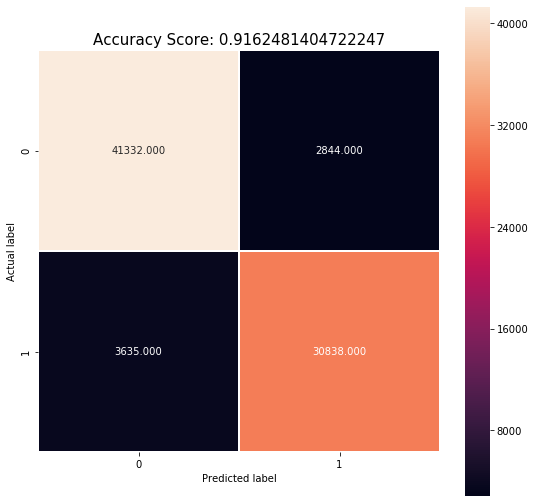

In [186]:
print(metrics.classification_report(y_pred=y_test_pred_rf,y_true=test_dep))

plt.figure(figsize=(9,9)) 
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title, size = 15)

7.Ensemble - Logistic + Random Forest Grid + AdapBoosting + XgBoosting

In [187]:
#Models are already fitted above
#Logistic
#Random Forest Grid
#Adaptive Boosting
#XG Boosting

#predicting the probabilities in test
pred_lr=mymodel.predict_proba(test_ind[features])
pred_rfg=clf_grid.predict_proba(test_ind[features])
pred_adap=model_ada_v1.predict_proba(test_ind[features])
pred_xg=xgb_model.predict_proba(test_ind[features])

NameError: name 'xgb_model' is not defined

In [ ]:
#Voting from the 4 predictions above in test
finalpred=(pred_lr+pred_rfg+pred_adap+pred_xg)/4

In [ ]:
#creating the dataframe with predicted probabilities (for 0 and 1)
pred_proba_avg=pd.DataFrame(finalpred)
pred_proba_avg

In [ ]:
#the results have 2 probabilities: prob of the state being 0 and state being 1 in that order: hence the 2 columns
col_names=['prob_0','prob_1']
pred_proba_avg.columns=col_names

In [ ]:
# if the probability of 0> probability of 1: state is 0 and vice versa
def final_state(c):
    if c['prob_0'] > c['prob_1']:
        return 0
    else:
        return 1
#creating the final predicted state column using the averaging method    
pred_proba_avg['final_state_avg'] = pred_proba_avg.apply(final_state, axis=1)

In [ ]:
#appending to base dataframe
test_ind_v1=test_ind
test_ind_v1 = test_ind_v1.reset_index(drop=True)
pred_proba_avg = pred_proba_avg.reset_index(drop=True)
test_ind_v1=pd.concat([test_ind_v1,pred_proba_avg],axis=1)

#Model Evaluation
print ("Test Accuracy  :: ", accuracy_score(test_dep[response],test_ind_v1['final_state_avg']))

In [ ]:
conf_matrix = metrics.confusion_matrix(y_pred=test_ind_v1['final_state_avg'],y_true=test_dep)
print(metrics.classification_report(y_pred=test_ind_v1['final_state_avg'],y_true=test_dep))

In [ ]:
plt.figure(figsize=(9,9)) 
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title, size = 15)

In [ ]:
precision_score_test_en2=precision_score(test_dep, test_ind_v1['final_state_avg'])
recall_score_test_en2=recall_score(test_dep, test_ind_v1['final_state_avg'])

In [ ]:
print("Precission:",precision_score_test_en2*100)
print("Recall:",recall_score_test_en2*100)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_dep, test_ind_v1['final_state_avg']) 

def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

In [ ]:
from vecstack import stacking

8.Ensemble Model - LGBM/Logistic Regression/XGBClassifier

In [ ]:
models =[
    lgb.LGBMClassifier(objective='binary', random_state=0),
    LogisticRegression(solver = 'lbfgs',random_state=0),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,n_estimators=100, max_depth=3)]

S_train, S_test = stacking(models,            
                           train_ind, train_dep, test_ind,
                           regression=False,
                           mode='oof_pred_bag',
                           needs_proba=False,
                           save_dir=None,
                           metric=accuracy_score,
                           n_folds=10,
                           stratified=True,
                           shuffle=True, 
                           random_state=0, 
                           verbose=2)


model = XGBClassifier(random_state=2351, n_jobs=-1, learning_rate=0.1,
                      n_estimators=100, max_depth=3)



In [ ]:
model = model.fit(S_train, train_dep)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(test_dep, y_pred))
y_pred=(y_pred>0.5).astype('int64')
y_pred=y_pred.tolist()
y_true = list(test_dep)

Ensemble Stacked modeling - Results considered for the presentation

In [ ]:
conf_matrix = metrics.confusion_matrix(y_pred=y_pred,y_true=test_dep)
print(metrics.classification_report(y_pred=y_pred,y_true=test_dep))

plt.figure(figsize=(9,9)) 
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap=None)
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title, size = 15)

In [ ]:
precision_score_test_en3=precision_score(test_dep, y_pred)
recall_score_test_en3=recall_score(test_dep, y_pred)

print("Precission:",precision_score_test_en3*100)
print("Recall:",recall_score_test_en3*100)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_dep, y_pred) 

def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr) 
plt.show()

In [ ]:
print(metrics.classification_report(y_pred=y_pred,y_true=test_dep))

Step 3 :<b>Predicting the results for the live data<b>

In [ ]:
kickstarter_live = pd.read_csv('C:/Sapna/Graham/Data Mining/Project/Kickstarter/Datasets/test/Processed data/Feature_engineered_data_live.csv',engine='python')

In [ ]:
kickstarter_live.size
kickstarter_live.shape
kickstarter_live.info()

In [ ]:
print(list(kickstarter_live))

In [ ]:
kickstarter_live_copy = kickstarter_live

In [ ]:
#print(kickstarter_data.shape)
#print(kickstarter_data_v1.shape)
kickstarter_live.groupby(['main_category_name']).size()
kickstarter_live.groupby(['main_category_name','category_name']).size()
kickstarter_live.groupby(['name_words']).size()

In [ ]:
#kickstarter_data = kickstarter_data_v1[(kickstarter_data_v1['name_words']<17)]
kickstarter_live.shape
kickstarter_live.groupby(['weekday']).size()
kickstarter_live.groupby(['launched_quarter']).size()
kickstarter_live.groupby(['name_words']).size()

In [ ]:
print(list(kickstarter_live))

drop_columns= ['category_name','duration_st_dead','change_flag','launched_month','launched_week',
               #'median_goal_year',
              #'mean_goal_year',
               'participants_mth','participants_wk']
#dropping columns above
kickstarter_live.drop(drop_columns, axis=1, inplace=True)

print(list(kickstarter_live))

In [ ]:
print('Min:',kickstarter_data['usd_goal_real'].min())
print('Mean:',kickstarter_data['usd_goal_real'].mean())
print('Median:',kickstarter_data['usd_goal_real'].median())
print('Mode:',kickstarter_data['usd_goal_real'].mode())
print('Max:',kickstarter_data['usd_goal_real'].max())

################# PERCENTILES  ##################################
goal_arr=kickstarter_data['usd_goal_real']
print('5th percentile:',np.percentile(goal_arr, 5))
print('10th percentile:',np.percentile(goal_arr, 10))
print('25th percentile:',np.percentile(goal_arr, 25))
print('50th percentile:',np.percentile(goal_arr, 50))
print('75th percentile:',np.percentile(goal_arr, 75))
print('90th percentile:',np.percentile(goal_arr, 90))
print('95th percentile:',np.percentile(goal_arr, 95))
print('99th percentile:',np.percentile(goal_arr, 99))

In [ ]:
# One-Hot encoding to convert categorical columns to numeric
print('start one-hot encoding')

kickstarter_live = pd.get_dummies(kickstarter_live, prefix = ['cat','weekday','quart'],
                             columns = ['main_category_name','weekday','launched_quarter'])
    
#this will have created 1-0 flag columns (like a sparse matrix)    
print('ADS dummy columns made')

print(list(kickstarter_live))

In [ ]:
# Dropping one dummy variable for each of the variables 
drop_columns= ['cat_Film & Video','weekday_6','quart_4']
#dropping columns above
kickstarter_live.drop(drop_columns, axis=1, inplace=True)

In [ ]:
#kickstarter_data.to_csv(r'C:/Sapna/Graham/Data Mining/Project/Kickstarter/Datasets/test/Processed data/Feature_engineered_data_dumenc_r.csv', index = False)

#creating 2 arrays: features and response
#features will have all independent variables
features=list(kickstarter_live)
#features.remove('state')
#response has the target variable
#response= ['state']

In [ ]:
kickstarter_live[features].shape
#kickstarter_data.head()
#kick_projects_ip.info()
print(list(kickstarter_live))

In [ ]:
import seaborn as sb
sb.heatmap(kickstarter_live.corr())
kickstarter_live.shape

In [ ]:
test_ind_live = kickstarter_live[features]
test_ind_live.shape

In [ ]:
log_live=mymodel.predict(test_ind_live[features])

In [ ]:
log_live_df = pd.DataFrame(data=log_live,columns=["Predictions"])
log_live_df.groupby(['Predictions']).size()

In [ ]:
ada_boost_prob_live = model_ada_v1.predict_proba(test_ind_live[features])
ada_boost_prediction_live = model_ada_v1.predict(test_ind_live[features])

In [ ]:
ada_boost_prediction_live

In [ ]:
ada_boost_prediction_live_df = pd.DataFrame(data=ada_boost_prediction_live,columns=["Predictions"])
ada_boost_prediction_live_df.groupby(['Predictions']).size()

In [ ]:
xgboost_prediction_live = xgb_model.predict(test_ind_live[features])
xgboost_prediction_live_df = pd.DataFrame(data=xgboost_prediction_live,columns=["Predictions"])
xgboost_prediction_live_df.groupby(['Predictions']).size()

In [ ]:
rfg_prediction_live = clf_grid.predict(test_ind_live[features])
rfg_prediction_live_df = pd.DataFrame(data=rfg_prediction_live,columns=["Predictions"])
rfg_prediction_live_df.groupby(['Predictions']).size()

In [ ]:
test_ind_live['Predictions'] = ada_boost_prediction_live

In [ ]:
result_live_v1=pd.concat([kickstarter_live_copy, ada_boost_prediction_live_df], axis=1, join='inner')

In [ ]:
result_live_v1

In [ ]:
result_live.to_excel(r'C:\Sapna\Graham\Data Mining\Project\Kickstarter\Datasets\test\Processed data\Live_Data_predictions.xlsx')